In [1]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 1, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 914 (delta 0), reused 0 (delta 0), pack-reused 913
Receiving objects: 100% (914/914), 125.53 MiB | 12.83 MiB/s, done.
Resolving deltas: 100% (525/525), done.


In [2]:
%cd Mask_RCNN

!pip install -q PyDrive
!pip install -r requirements.txt
!python setup.py install

/content/Mask_RCNN
    100% |████████████████████████████████| 204kB 27.6MB/s 
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/model.py -> build/lib/mrcnn
copying mrcnn/visualize.py -> build/lib/mrcnn
copying mrcnn/utils.py -> build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
creating build/bdist.linux-x86_64
creating build/bdi

In [3]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [10]:
from google.colab import files
files.upload()

!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c data-science-bowl-2018

Saving kaggle.json to kaggle.json
  0% 0.00/2.62k [00:00<?, ?B/s]
100% 2.62k/2.62k [00:00<00:00, 1.00MB/s]
  0% 0.00/2.67M [00:00<?, ?B/s]
100% 2.67M/2.67M [00:00<00:00, 43.6MB/s]
 55% 5.00M/9.10M [00:00<00:00, 25.9MB/s]
100% 9.10M/9.10M [00:00<00:00, 36.1MB/s]
 92% 73.0M/79.1M [00:00<00:00, 75.6MB/s]
100% 79.1M/79.1M [00:00<00:00, 101MB/s] 
  0% 0.00/112k [00:00<?, ?B/s]
100% 112k/112k [00:00<00:00, 37.4MB/s]
 98% 270M/276M [00:03<00:00, 81.2MB/s]
100% 276M/276M [00:03<00:00, 89.3MB/s]
  0% 0.00/386k [00:00<?, ?B/s]
100% 386k/386k [00:00<00:00, 53.1MB/s]


In [11]:
!unzip stage1_train.zip -d stage1_train

Archive:  stage1_train.zip
   creating: stage1_train/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/
   creating: stage1_train/003cee89357d9fe13516167fd67b609a164651b21934585648c740d2c3d86dc1/
   creating: stage1_train/00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e/
   creating: stage1_train/0121d6759c5adb290c8e828fc882f37dfaf3663ec885c663859948c154a443ed/
   creating: stage1_train/01d44a26f6680c42ba94c9bc6339228579a95d0e2695b149b7cc0c9592b21baf/
   creating: stage1_train/0280fa8f60f6bcae0f97d93c28f60be194f9309ff610dc5845e60455b0f87c21/
   creating: stage1_train/0287e7ee5b007c91ae2bd7628d09735e70496bc6127ecb7f3dd043e04ce37426/
   creating: stage1_train/02903040e19ddf92f452907644ad3822918f54af41dd85e5a3fe3e1b6d6f9339/
   creating: stage1_train/03398329ced0c23b9ac3fac84dd53a87d9ffe4d9d10f1b5fe8df8fac12380776/
   creating: stage1_train/03b9306f44e9b8951461623dcbd615550cdcf36ea93b203f2c8fa58ed1dffcbe/
   creating: stage1_train/03f583ec5018739f4abb9b3b4a5

In [12]:
!unzip stage1_test.zip -d stage1_test

Archive:  stage1_test.zip
   creating: stage1_test/0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5/
   creating: stage1_test/0999dab07b11bc85fb8464fc36c947fbd8b5d6ec49817361cb780659ca805eac/
   creating: stage1_test/0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732/
   creating: stage1_test/0e132f71c8b4875c3c2dd7a22997468a3e842b46aa9bd47cf7b0e8b7d63f0925/
   creating: stage1_test/0ed3555a4bd48046d3b63d8baf03a5aa97e523aa483aaa07459e7afa39fb96c6/
   creating: stage1_test/0f1f896d9ae5a04752d3239c690402c022db4d72c0d2c087d73380896f72c466/
   creating: stage1_test/1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c/
   creating: stage1_test/17b9bf4356db24967c4677b8376ac38f826de73a88b93a8d73a8b452e399cdff/
   creating: stage1_test/1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b/
   creating: stage1_test/191b2b2205f2f5cc9da04702c5d422bc249faf8bca1107af792da63cccfba829/
   creating: stage1_test/1962d0c5faf3e85cda80e0578e0cb7aca50826d

In [0]:
import os
os.chdir("samples/nucleus")

In [16]:
!ls

inspect_nucleus_data.ipynb  inspect_nucleus_model.ipynb  nucleus.py  README.md


### Editing the `nucleus.py` file

In [17]:
%%writefile nucleus.py
"""
Mask R-CNN
Train on the nuclei segmentation dataset from the
Kaggle 2018 Data Science Bowl
https://www.kaggle.com/c/data-science-bowl-2018/

Licensed under the MIT License (see LICENSE for details)
Written by Waleed Abdulla

------------------------------------------------------------

Usage: import the module (see Jupyter notebooks for examples), or run from
       the command line as such:

    # Train a new model starting from ImageNet weights
    python3 nucleus.py train --dataset=/path/to/dataset --subset=train --weights=imagenet

    # Train a new model starting from specific weights file
    python3 nucleus.py train --dataset=/path/to/dataset --subset=train --weights=/path/to/weights.h5

    # Resume training a model that you had trained earlier
    python3 nucleus.py train --dataset=/path/to/dataset --subset=train --weights=last

    # Generate submission file
    python3 nucleus.py detect --dataset=/path/to/dataset --subset=train --weights=<last or /path/to/weights.h5>
"""

# Set matplotlib backend
# This has to be done before other importa that might
# set it, but only if we're running in script mode
# rather than being imported.
if __name__ == '__main__':
    import matplotlib
    # Agg backend runs without a display
    matplotlib.use('Agg')
    import matplotlib.pyplot as plt

import os
import sys
import json
import datetime
import numpy as np
import skimage.io
from imgaug import augmenters as iaa
from keras.models import load_model
import h5py

# model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# # returns a compiled model
# # identical to the previous one
# model = load_model('my_model.h5')

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
from mrcnn import model as modellib
from mrcnn import visualize

# Path to trained weights file
COCO_WEIGHTS_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Directory to save logs and model checkpoints, if not provided
# through the command line argument --logs
DEFAULT_LOGS_DIR = os.path.join(ROOT_DIR, "logs")

# Results directory
# Save submission files here
RESULTS_DIR = os.path.join(ROOT_DIR, "results/nucleus/")

# The dataset doesn't have a standard train/val split, so I picked
# a variety of images to surve as a validation set.
VAL_IMAGE_IDS = [
    "0c2550a23b8a0f29a7575de8c61690d3c31bc897dd5ba66caec201d201a278c2",
    "92f31f591929a30e4309ab75185c96ff4314ce0a7ead2ed2c2171897ad1da0c7",
    "1e488c42eb1a54a3e8412b1f12cde530f950f238d71078f2ede6a85a02168e1f",
    "c901794d1a421d52e5734500c0a2a8ca84651fb93b19cec2f411855e70cae339",
    "8e507d58f4c27cd2a82bee79fe27b069befd62a46fdaed20970a95a2ba819c7b",
    "60cb718759bff13f81c4055a7679e81326f78b6a193a2d856546097c949b20ff",
    "da5f98f2b8a64eee735a398de48ed42cd31bf17a6063db46a9e0783ac13cd844",
    "9ebcfaf2322932d464f15b5662cae4d669b2d785b8299556d73fffcae8365d32",
    "1b44d22643830cd4f23c9deadb0bd499fb392fb2cd9526d81547d93077d983df",
    "97126a9791f0c1176e4563ad679a301dac27c59011f579e808bbd6e9f4cd1034",
    "e81c758e1ca177b0942ecad62cf8d321ffc315376135bcbed3df932a6e5b40c0",
    "f29fd9c52e04403cd2c7d43b6fe2479292e53b2f61969d25256d2d2aca7c6a81",
    "0ea221716cf13710214dcd331a61cea48308c3940df1d28cfc7fd817c83714e1",
    "3ab9cab6212fabd723a2c5a1949c2ded19980398b56e6080978e796f45cbbc90",
    "ebc18868864ad075548cc1784f4f9a237bb98335f9645ee727dac8332a3e3716",
    "bb61fc17daf8bdd4e16fdcf50137a8d7762bec486ede9249d92e511fcb693676",
    "e1bcb583985325d0ef5f3ef52957d0371c96d4af767b13e48102bca9d5351a9b",
    "947c0d94c8213ac7aaa41c4efc95d854246550298259cf1bb489654d0e969050",
    "cbca32daaae36a872a11da4eaff65d1068ff3f154eedc9d3fc0c214a4e5d32bd",
    "f4c4db3df4ff0de90f44b027fc2e28c16bf7e5c75ea75b0a9762bbb7ac86e7a3",
    "4193474b2f1c72f735b13633b219d9cabdd43c21d9c2bb4dfc4809f104ba4c06",
    "f73e37957c74f554be132986f38b6f1d75339f636dfe2b681a0cf3f88d2733af",
    "a4c44fc5f5bf213e2be6091ccaed49d8bf039d78f6fbd9c4d7b7428cfcb2eda4",
    "cab4875269f44a701c5e58190a1d2f6fcb577ea79d842522dcab20ccb39b7ad2",
    "8ecdb93582b2d5270457b36651b62776256ade3aaa2d7432ae65c14f07432d49",
]


############################################################
#  Configurations
############################################################

class NucleusConfig(Config):
    """Configuration for training on the nucleus segmentation dataset."""
    # Give the configuration a recognizable name
    NAME = "nucleus"

    # Adjust depending on your GPU memory
    IMAGES_PER_GPU = 6

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # Background + nucleus

    # Number of training and validation steps per epoch
    STEPS_PER_EPOCH = (657 - len(VAL_IMAGE_IDS)) // IMAGES_PER_GPU
    VALIDATION_STEPS = max(1, len(VAL_IMAGE_IDS) // IMAGES_PER_GPU)

    # Don't exclude based on confidence. Since we have two classes
    # then 0.5 is the minimum anyway as it picks between nucleus and BG
    DETECTION_MIN_CONFIDENCE = 0

    # Backbone network architecture
    # Supported values are: resnet50, resnet101
    BACKBONE = "resnet50"

    # Input image resizing
    # Random crops of size 512x512
    IMAGE_RESIZE_MODE = "crop"
    IMAGE_MIN_DIM = 512
    IMAGE_MAX_DIM = 512
    IMAGE_MIN_SCALE = 2.0

    # Length of square anchor side in pixels
    RPN_ANCHOR_SCALES = (8, 16, 32, 64, 128)

    # ROIs kept after non-maximum supression (training and inference)
    POST_NMS_ROIS_TRAINING = 1000
    POST_NMS_ROIS_INFERENCE = 2000

    # Non-max suppression threshold to filter RPN proposals.
    # You can increase this during training to generate more propsals.
    RPN_NMS_THRESHOLD = 0.9

    # How many anchors per image to use for RPN training
    RPN_TRAIN_ANCHORS_PER_IMAGE = 64

    # Image mean (RGB)
    MEAN_PIXEL = np.array([43.53, 39.56, 48.22])

    # If enabled, resizes instance masks to a smaller size to reduce
    # memory load. Recommended when using high-resolution images.
    USE_MINI_MASK = True
    MINI_MASK_SHAPE = (56, 56)  # (height, width) of the mini-mask

    # Number of ROIs per image to feed to classifier/mask heads
    # The Mask RCNN paper uses 512 but often the RPN doesn't generate
    # enough positive proposals to fill this and keep a positive:negative
    # ratio of 1:3. You can increase the number of proposals by adjusting
    # the RPN NMS threshold.
    TRAIN_ROIS_PER_IMAGE = 128

    # Maximum number of ground truth instances to use in one image
    MAX_GT_INSTANCES = 200

    # Max number of final detections per image
    DETECTION_MAX_INSTANCES = 400


class NucleusInferenceConfig(NucleusConfig):
    # Set batch size to 1 to run one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    # Don't resize imager for inferencing
    IMAGE_RESIZE_MODE = "pad64"
    # Non-max suppression threshold to filter RPN proposals.
    # You can increase this during training to generate more propsals.
    RPN_NMS_THRESHOLD = 0.7


############################################################
#  Dataset
############################################################

class NucleusDataset(utils.Dataset):

    def load_nucleus(self, dataset_dir, subset):
        """Load a subset of the nuclei dataset.

        dataset_dir: Root directory of the dataset
        subset: Subset to load. Either the name of the sub-directory,
                such as stage1_train, stage1_test, ...etc. or, one of:
                * train: stage1_train excluding validation images
                * val: validation images from VAL_IMAGE_IDS
        """
        # Add classes. We have one class.
        # Naming the dataset nucleus, and the class nucleus
        self.add_class("nucleus", 1, "nucleus")

        # Which subset?
        # "val": use hard-coded list above
        # "train": use data from stage1_train minus the hard-coded list above
        # else: use the data from the specified sub-directory
        assert subset in ["train", "val", "stage1_train", "stage1_test", "stage2_test"]
        subset_dir = "stage1_train" if subset in ["train", "val"] else subset
        dataset_dir = os.path.join(dataset_dir, subset_dir)
        if subset == "val":
            image_ids = VAL_IMAGE_IDS
        else:
            # Get image ids from directory names
            image_ids = next(os.walk(dataset_dir))[1]
            if subset == "train":
                image_ids = list(set(image_ids) - set(VAL_IMAGE_IDS))

        # Add images
        for image_id in image_ids:
            self.add_image(
                "nucleus",
                image_id=image_id,
                path=os.path.join(dataset_dir, image_id, "images/{}.png".format(image_id)))

    def load_mask(self, image_id):
        """Generate instance masks for an image.
       Returns:
        masks: A bool array of shape [height, width, instance count] with
            one mask per instance.
        class_ids: a 1D array of class IDs of the instance masks.
        """
        info = self.image_info[image_id]
        # Get mask directory from image path
        mask_dir = os.path.join(os.path.dirname(os.path.dirname(info['path'])), "masks")

        # Read mask files from .png image
        mask = []
        for f in next(os.walk(mask_dir))[2]:
            if f.endswith(".png"):
                m = skimage.io.imread(os.path.join(mask_dir, f)).astype(np.bool)
                mask.append(m)
        mask = np.stack(mask, axis=-1)
        # Return mask, and array of class IDs of each instance. Since we have
        # one class ID, we return an array of ones
        return mask, np.ones([mask.shape[-1]], dtype=np.int32)

    def image_reference(self, image_id):
        """Return the path of the image."""
        info = self.image_info[image_id]
        if info["source"] == "nucleus":
            return info["id"]
        else:
            super(self.__class__, self).image_reference(image_id)


############################################################
#  Training
############################################################

def train(model, dataset_dir, subset):
    """Train the model."""
    # Training dataset.
    dataset_train = NucleusDataset()
    dataset_train.load_nucleus(dataset_dir, subset)
    dataset_train.prepare()

    # Validation dataset
    dataset_val = NucleusDataset()
    dataset_val.load_nucleus(dataset_dir, "val")
    dataset_val.prepare()

    # Image augmentation
    # http://imgaug.readthedocs.io/en/latest/source/augmenters.html
    augmentation = iaa.SomeOf((0, 2), [
        iaa.Fliplr(0.5),
        iaa.Flipud(0.5),
        iaa.OneOf([iaa.Affine(rotate=90),
                   iaa.Affine(rotate=180),
                   iaa.Affine(rotate=270)]),
        iaa.Multiply((0.8, 1.5)),
        iaa.GaussianBlur(sigma=(0.0, 5.0))
    ])

    # *** This training schedule is an example. Update to your needs ***

    # If starting from imagenet, train heads only for a bit
    # since they have random weights
    print("Train network heads")
    model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=25,
                augmentation=augmentation,
                layers='heads')
    

#     print("Train all layers")
#     model.train(dataset_train, dataset_val,
#                 learning_rate=config.LEARNING_RATE,
#                 epochs=2,
#                 augmentation=augmentation,
#                 layers='all')


############################################################
#  RLE Encoding
############################################################

def rle_encode(mask):
    """Encodes a mask in Run Length Encoding (RLE).
    Returns a string of space-separated values.
    """
    assert mask.ndim == 2, "Mask must be of shape [Height, Width]"
    # Flatten it column wise
    m = mask.T.flatten()
    # Compute gradient. Equals 1 or -1 at transition points
    g = np.diff(np.concatenate([[0], m, [0]]), n=1)
    # 1-based indicies of transition points (where gradient != 0)
    rle = np.where(g != 0)[0].reshape([-1, 2]) + 1
    # Convert second index in each pair to lenth
    rle[:, 1] = rle[:, 1] - rle[:, 0]
    return " ".join(map(str, rle.flatten()))


def rle_decode(rle, shape):
    """Decodes an RLE encoded list of space separated
    numbers and returns a binary mask."""
    rle = list(map(int, rle.split()))
    rle = np.array(rle, dtype=np.int32).reshape([-1, 2])
    rle[:, 1] += rle[:, 0]
    rle -= 1
    mask = np.zeros([shape[0] * shape[1]], np.bool)
    for s, e in rle:
        assert 0 <= s < mask.shape[0]
        assert 1 <= e <= mask.shape[0], "shape: {}  s {}  e {}".format(shape, s, e)
        mask[s:e] = 1
    # Reshape and transpose
    mask = mask.reshape([shape[1], shape[0]]).T
    return mask


def mask_to_rle(image_id, mask, scores):
    "Encodes instance masks to submission format."
    assert mask.ndim == 3, "Mask must be [H, W, count]"
    # If mask is empty, return line with image ID only
    if mask.shape[-1] == 0:
        return "{},".format(image_id)
    # Remove mask overlaps
    # Multiply each instance mask by its score order
    # then take the maximum across the last dimension
    order = np.argsort(scores)[::-1] + 1  # 1-based descending
    mask = np.max(mask * np.reshape(order, [1, 1, -1]), -1)
    # Loop over instance masks
    lines = []
    for o in order:
        m = np.where(mask == o, 1, 0)
        # Skip if empty
        if m.sum() == 0.0:
            continue
        rle = rle_encode(m)
        lines.append("{}, {}".format(image_id, rle))
    return "\n".join(lines)


############################################################
#  Detection
############################################################

def detect(model, dataset_dir, subset):
    """Run detection on images in the given directory."""
    print("Running on {}".format(dataset_dir))

    # Create directory
    if not os.path.exists(RESULTS_DIR):
        os.makedirs(RESULTS_DIR)
    submit_dir = "submit_{:%Y%m%dT%H%M%S}".format(datetime.datetime.now())
    submit_dir = os.path.join(RESULTS_DIR, submit_dir)
    os.makedirs(submit_dir)

    # Read dataset
    dataset = NucleusDataset()
    dataset.load_nucleus(dataset_dir, subset)
    dataset.prepare()
    # Load over images
    submission = []
    for image_id in dataset.image_ids:
        # Load image and run detection
        image = dataset.load_image(image_id)
        # Detect objects
        r = model.detect([image], verbose=0)[0]
        # Encode image to RLE. Returns a string of multiple lines
        source_id = dataset.image_info[image_id]["id"]
        rle = mask_to_rle(source_id, r["masks"], r["scores"])
        submission.append(rle)
        # Save image with masks
        visualize.display_instances(
            image, r['rois'], r['masks'], r['class_ids'],
            dataset.class_names, r['scores'],
            show_bbox=False, show_mask=False,
            title="Predictions")
        plt.savefig("{}/{}.png".format(submit_dir, dataset.image_info[image_id]["id"]))

    # Save to csv file
    submission = "ImageId,EncodedPixels\n" + "\n".join(submission)
    file_path = os.path.join(submit_dir, "submit.csv")
    with open(file_path, "w") as f:
        f.write(submission)
    print("Saved to ", submit_dir)


############################################################
#  Command Line
############################################################

if __name__ == '__main__':
    import argparse
    import h5py
    import keras

    # Parse command line arguments
    parser = argparse.ArgumentParser(
        description='Mask R-CNN for nuclei counting and segmentation')
    parser.add_argument("command",
                        metavar="<command>",
                        help="'train' or 'detect'")
    parser.add_argument('--dataset', required=False,
                        metavar="/path/to/dataset/",
                        help='Root directory of the dataset')
    parser.add_argument('--weights', required=True,
                        metavar="/path/to/weights.h5",
                        help="Path to weights .h5 file or 'coco'")
    parser.add_argument('--logs', required=False,
                        default=DEFAULT_LOGS_DIR,
                        metavar="/path/to/logs/",
                        help='Logs and checkpoints directory (default=logs/)')
    parser.add_argument('--subset', required=False,
                        metavar="Dataset sub-directory",
                        help="Subset of dataset to run prediction on")
    args = parser.parse_args()

    # Validate arguments
    if args.command == "train":
        assert args.dataset, "Argument --dataset is required for training"
    elif args.command == "detect":
        assert args.subset, "Provide --subset to run prediction on"

    print("Weights: ", args.weights)
    print("Dataset: ", args.dataset)
    if args.subset:
        print("Subset: ", args.subset)
    print("Logs: ", args.logs)

    # Configurations
    if args.command == "train":
        config = NucleusConfig()
    else:
        config = NucleusInferenceConfig()
    config.display()

    # Create model
    if args.command == "train":
        model = modellib.MaskRCNN(mode="training", config=config,
                                  model_dir=args.logs)
    else:
        model = modellib.MaskRCNN(mode="inference", config=config,
                                  model_dir=args.logs)

    # Select weights file to load
    if args.weights.lower() == "coco":
        weights_path = COCO_WEIGHTS_PATH
        # Download weights file
        if not os.path.exists(weights_path):
            utils.download_trained_weights(weights_path)
    elif args.weights.lower() == "last":
        # Find last trained weights
        weights_path = model.find_last()
    elif args.weights.lower() == "imagenet":
        # Start from ImageNet trained weights
        weights_path = model.get_imagenet_weights()
    else:
        weights_path = args.weights

    # Load weights
    print("Loading weights ", weights_path)
    if args.weights.lower() == "coco":
        # Exclude the last layers because they require a matching
        # number of classes
        model.load_weights(weights_path, by_name=True, exclude=[
            "mrcnn_class_logits", "mrcnn_bbox_fc",
            "mrcnn_bbox", "mrcnn_mask"])
    else:
        model.load_weights(weights_path, by_name=True)

    # Train or evaluate
    if args.command == "train":
        train(model, args.dataset, args.subset)
    elif args.command == "detect":
        detect(model, args.dataset, args.subset)
    else:
        print("'{}' is not recognized. "
              "Use 'train' or 'detect'".format(args.command))

Overwriting nucleus.py


## Training the model

In [31]:
!python3 "nucleus.py" train --dataset="../../" --subset="train" --weights="../../log/nucleus20190108T0251/mask_rcnn_nucleus_0020.h5"

Using TensorFlow backend.
Weights:  ../../log/nucleus20190108T0251/mask_rcnn_nucleus_0020.h5
Dataset:  ../../
Subset:  train
Logs:  /content/Mask_RCNN/logs

Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     6
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 6
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                2.0
IMAGE_RESIZE_MODE              crop
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0,

## Prediction on Validation Set

In [33]:
!python3 nucleus.py detect --dataset="../../" --subset=stage1_test --weights=last

Using TensorFlow backend.
Weights:  last
Dataset:  ../../
Subset:  stage1_test
Logs:  /content/Mask_RCNN/logs

Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                2.0
IMAGE_RESIZE_MODE              pad64
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.

In [0]:
os.chdir("../../samples/nucleus")

In [30]:
!ls

inspect_nucleus_data.ipynb  inspect_nucleus_model.ipynb  nucleus.py  README.md


# Plot mAP of Training and Testing Data

In [34]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import nucleus

%matplotlib inline 

# Directory to save logs and trained model
LOGS_DIR = os.path.join(ROOT_DIR, "logs")

Using TensorFlow backend.


In [0]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# Only inference mode is supported right now
TEST_MODE = "training"

In [0]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    fig.tight_layout()
    return ax

In [37]:
# Dataset directory
DATASET_DIR = os.path.join(ROOT_DIR)

# Inference Configuration
config = nucleus.NucleusInferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                2.0
IMAGE_RESIZE_MODE              pad64
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE               

## Load Train Dataset

In [38]:
# Load training dataset
dataset = nucleus.NucleusDataset()
dataset.load_nucleus(DATASET_DIR, "train")
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 645
Classes: ['BG', 'nucleus']


## Create Model

In [39]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference",
                              model_dir=LOGS_DIR,
                              config=config)

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.


## Weights of trained model

In [40]:
# Path to a specific weights file
weights_path = "../../logs/nucleus20190108T0251/mask_rcnn_nucleus_0025.h5"

# Or, load the last model you trained
#weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  ../../logs/nucleus20190108T0251/mask_rcnn_nucleus_0025.h5
Re-starting from epoch 25


## Run Detection

In [0]:
def detection(dataset,config,model):
  image_id = random.choice(dataset.image_ids)
  image, image_meta, gt_class_id, gt_bbox, gt_mask =\
      modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
  info = dataset.image_info[image_id]
  print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                         dataset.image_reference(image_id)))
  print("Original image shape: ", modellib.parse_image_meta(image_meta[np.newaxis,...])["original_image_shape"][0])

  # Run object detection
  results = model.detect_molded(np.expand_dims(image, 0), np.expand_dims(image_meta, 0), verbose=1)

  # Display results
  r = results[0]
  log("gt_class_id", gt_class_id)
  log("gt_bbox", gt_bbox)
  log("gt_mask", gt_mask)

  # Compute AP over range 0.5 to 0.95 and print it
  utils.compute_ap_range(gt_bbox, gt_class_id, gt_mask,
                         r['rois'], r['class_ids'], r['scores'], r['masks'],
                         verbose=1)


## Output of trained model

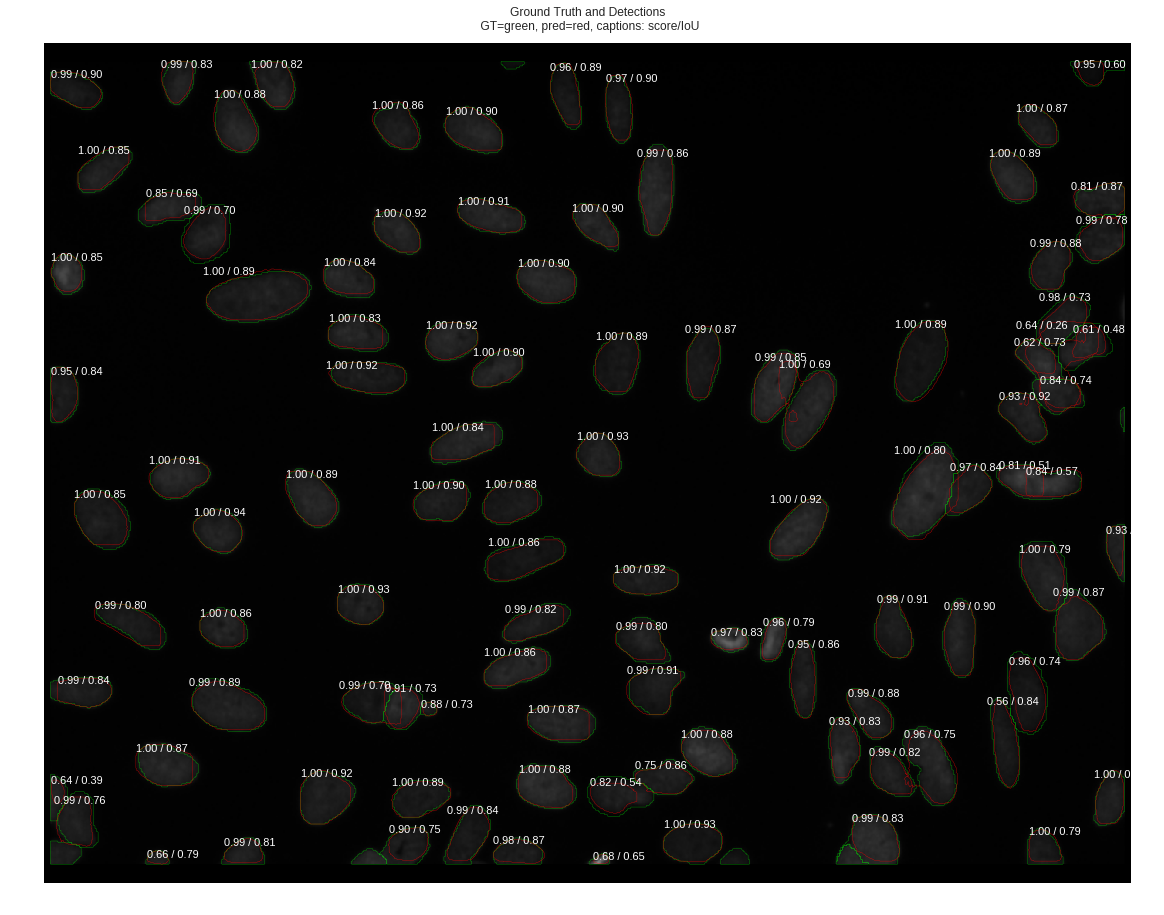

In [42]:
visualize.display_differences(
    image,
    gt_bbox, gt_class_id, gt_mask,
    r['rois'], r['class_ids'], r['scores'], r['masks'],
    dataset.class_names, ax=get_ax(),
    show_box=False, show_mask=False,
    iou_threshold=0.5, score_threshold=0.5)

In [43]:
def compute_batch_ap(dataset, image_ids, verbose=1):
    APs = []
    for image_id in image_ids:
        # Load image
        image, image_meta, gt_class_id, gt_bbox, gt_mask =\
            modellib.load_image_gt(dataset, config,
                                   image_id, use_mini_mask=False)
        # Run object detection
        results = model.detect_molded(image[np.newaxis], image_meta[np.newaxis], verbose=0)
        # Compute AP over range 0.5 to 0.95
        r = results[0]
        ap = utils.compute_ap_range(
            gt_bbox, gt_class_id, gt_mask,
            r['rois'], r['class_ids'], r['scores'], r['masks'],
            verbose=0)
        APs.append(ap)
        if verbose:
            info = dataset.image_info[image_id]
            meta = modellib.parse_image_meta(image_meta[np.newaxis,...])
            print("{:3} {}   AP: {:.2f}".format(
                meta["image_id"][0], meta["original_image_shape"][0], ap))
    return APs

# Run on validation set
limit = 50
APs = compute_batch_ap(dataset, dataset.image_ids[:limit])
print("Mean AP overa {} images: {:.4f}".format(len(APs), np.mean(APs)))

  0 [1024 1024    3]   AP: 0.35
  1 [256 256   3]   AP: 0.42
  2 [256 256   3]   AP: 0.68
  3 [520 696   3]   AP: 0.72
  4 [360 360   3]   AP: 0.36
  5 [520 696   3]   AP: 0.75
  6 [256 256   3]   AP: 0.26
  7 [256 256   3]   AP: 0.62
  8 [256 256   3]   AP: 0.68
  9 [360 360   3]   AP: 0.57
 10 [256 256   3]   AP: 0.65
 11 [360 360   3]   AP: 0.67
 12 [520 696   3]   AP: 0.60
 13 [520 696   3]   AP: 0.63
 14 [256 256   3]   AP: 0.61
 15 [360 360   3]   AP: 0.72
 16 [360 360   3]   AP: 0.56
 17 [256 256   3]   AP: 0.59
 18 [360 360   3]   AP: 0.57
 19 [256 256   3]   AP: 0.53
 20 [256 256   3]   AP: 0.40
 21 [256 320   3]   AP: 0.15
 22 [256 256   3]   AP: 0.48
 23 [360 360   3]   AP: 0.57
 24 [256 256   3]   AP: 0.60
 25 [256 320   3]   AP: 0.34
 26 [1024 1024    3]   AP: 0.42
 27 [256 256   3]   AP: 0.67
 28 [256 256   3]   AP: 0.50
 29 [256 320   3]   AP: 0.36
 30 [1024 1024    3]   AP: 0.12
 31 [256 256   3]   AP: 0.66
 32 [256 256   3]   AP: 0.53
 33 [256 320   3]   AP: 0.22
 34 [

### Plotting the mAP of training dataset

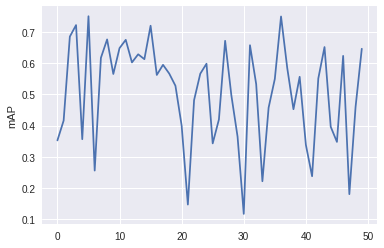

In [46]:
import matplotlib.pyplot as plt
plt.plot(APs)
plt.ylabel('mAP')
plt.show()

## mAP of Validation Dataset

In [47]:
# Load validation dataset
dataset_v = nucleus.NucleusDataset()
dataset_v.load_nucleus(DATASET_DIR, "val")
dataset_v.prepare()

print("Images: {}\nClasses: {}".format(len(dataset_v.image_ids), dataset_v.class_names))

Images: 25
Classes: ['BG', 'nucleus']


In [48]:
detection(dataset_v,config,model)

image ID: nucleus.e81c758e1ca177b0942ecad62cf8d321ffc315376135bcbed3df932a6e5b40c0 (10) e81c758e1ca177b0942ecad62cf8d321ffc315376135bcbed3df932a6e5b40c0
Original image shape:  [256 256   3]
Processing 1 images
image                    shape: (512, 512, 3)         min:    2.00000  max:  123.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min:    2.00000  max:  123.00000  uint8
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32
gt_class_id              shape: (47,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (47, 4)               min:    0.00000  max:  512.00000  int32
gt_mask                  shape: (512, 512, 47)        min:    0.00000  max:    1.00000  bool
AP @0.50:	 0.379
AP @0.55:	 0.361
AP @0.60:	 0.285
AP @0.65:	 0.271
AP @0.70:	 0.104
AP @0.75:	 0.046
AP @0.80:	 0.029
AP @0.85:	

In [50]:
APs = compute_batch_ap(dataset_v, dataset_v.image_ids)
print("Mean AP overa {} images: {:.4f}".format(len(APs), np.mean(APs)))

  0 [256 320   3]   AP: 0.35
  1 [256 320   3]   AP: 0.12
  2 [256 320   3]   AP: 0.28
  3 [1040 1388    3]   AP: 0.14
  4 [256 320   3]   AP: 0.18
  5 [256 256   3]   AP: 0.65
  6 [520 696   3]   AP: 0.57
  7 [256 320   3]   AP: 0.37
  8 [1024 1024    3]   AP: 0.30
  9 [360 360   3]   AP: 0.55
 10 [256 256   3]   AP: 0.15
 11 [ 603 1272    3]   AP: 0.10
 12 [520 696   3]   AP: 0.33
 13 [256 256   3]   AP: 0.29
 14 [256 320   3]   AP: 0.28
 15 [256 320   3]   AP: 0.29
 16 [256 256   3]   AP: 0.19
 17 [256 320   3]   AP: 0.16
 18 [256 320   3]   AP: 0.25
 19 [ 603 1272    3]   AP: 0.31
 20 [256 320   3]   AP: 0.17
 21 [256 256   3]   AP: 0.56
 22 [256 320   3]   AP: 0.33
 23 [256 256   3]   AP: 0.66
 24 [256 256   3]   AP: 0.62
Mean AP overa 25 images: 0.3283
